<a href="https://colab.research.google.com/github/kwankao26/229352-Course-Name-Statistical-Learning-for-Data-Science-2-Semester-1-2025/blob/Lab/660510753_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [ ]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [ ]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

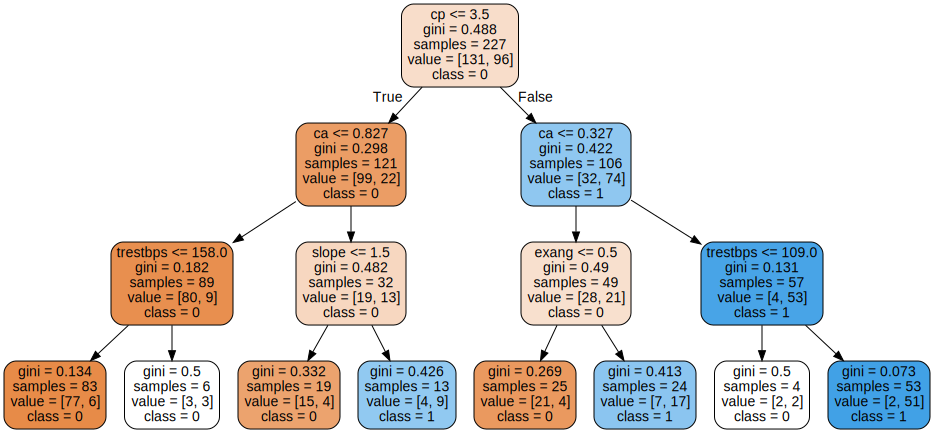

In [ ]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [ ]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in
, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [ ]:
#Decision Tree
pipe_dt = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'dt__max_depth': [None, 5, 10, 20],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)
print("Decision Tree best params:", grid_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Macro:", f1_score(y_test, y_pred_dt, average='macro'))

Decision Tree best params: {'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__min_samples_split': 5}
Accuracy: 0.7236842105263158
F1 Macro: 0.7224830464267084


In [ ]:
#Bagging with Decision Tree base estimator
pipe_bag = Pipeline([
    ('bagging', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42))
])

param_grid_bag = {
    'bagging__n_estimators': [10, 50, 100],
    'bagging__max_samples': [0.5, 0.7, 1.0],
    'bagging__max_features': [0.5, 0.7, 1.0]
}

grid_bag = GridSearchCV(pipe_bag, param_grid_bag, cv=5, scoring='accuracy', n_jobs=-1)
grid_bag.fit(X_train, y_train)

y_pred_bag = grid_bag.predict(X_test)
print("Bagging best params:", grid_bag.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("F1 Macro:", f1_score(y_test, y_pred_bag, average='macro'))

Bagging best params: {'bagging__max_features': 0.5, 'bagging__max_samples': 0.7, 'bagging__n_estimators': 50}
Accuracy: 0.7631578947368421
F1 Macro: 0.7631578947368421


In [ ]:
#Random Forest
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__max_features': ['sqrt', 'log2', 0.5]
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)
print("Random Forest best params:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Macro:", f1_score(y_test, y_pred_rf, average='macro'))

Random Forest best params: {'rf__max_depth': 10, 'rf__max_features': 0.5, 'rf__n_estimators': 100}
Accuracy: 0.7763157894736842
F1 Macro: 0.7759667071267556


Decision Tree - Accuracy: 0.7236842105263158 F1 Macro: 0.7224830464267084
Bagging - Accuracy: 0.7631578947368421 F1 Macro: 0.7631578947368421
Random Forest - Accuracy: 0.7763157894736842 F1 Macro: 0.7759667071267556

Best model is: Random Forest


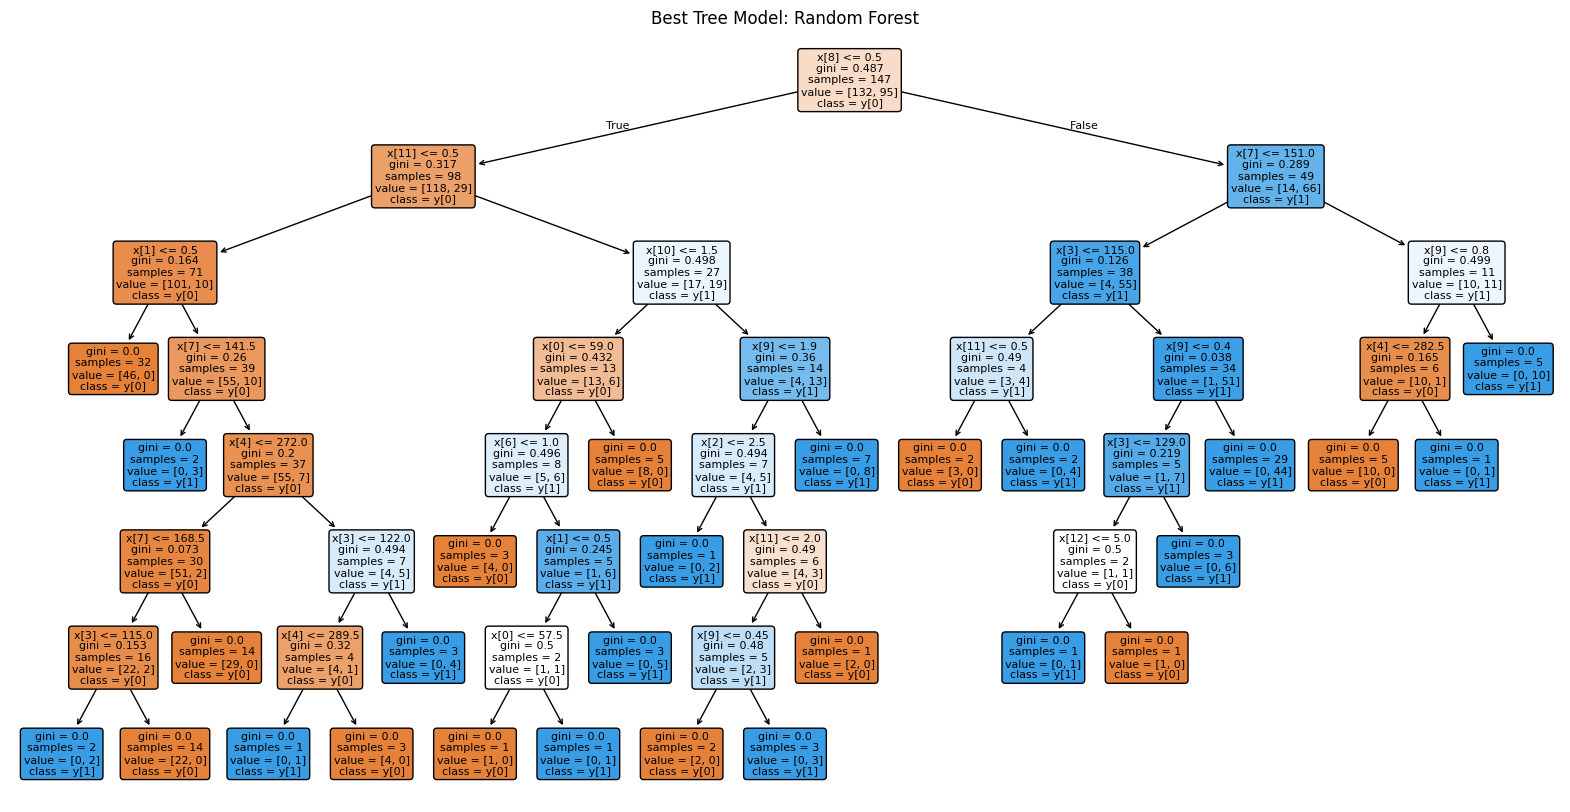


Best hyperparameters explanation:
จำนวนต้นไม้ในป่า (n_estimators): 100
ความลึกสูงสุดของต้นไม้ (max_depth): 10
จำนวนฟีเจอร์ที่สุ่มใช้ในแต่ละต้นไม้ (max_features): 0.5

Best hyperparameters values (raw):
{'rf__max_depth': 10, 'rf__max_features': 0.5, 'rf__n_estimators': 100}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. คำนวณ f1_macro และ accuracy ของแต่ละโมเดล
acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

acc_bag = accuracy_score(y_test, y_pred_bag)
f1_bag = f1_score(y_test, y_pred_bag, average='macro')

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("Decision Tree - Accuracy:", acc_dt, "F1 Macro:", f1_dt)
print("Bagging - Accuracy:", acc_bag, "F1 Macro:", f1_bag)
print("Random Forest - Accuracy:", acc_rf, "F1 Macro:", f1_rf)


# 2. หา best model จาก F1 Macro
results = {
    "Decision Tree": (acc_dt, f1_dt),
    "Bagging": (acc_bag, f1_bag),
    "Random Forest": (acc_rf, f1_rf)
}
best_model_name = max(results, key=lambda k: results[k][1])
print("\nBest model is:", best_model_name)


# 3. Plot best tree model
if best_model_name == "Decision Tree":
    best_tree = grid_dt.best_estimator_.named_steps['dt']
elif best_model_name == "Bagging":
    best_bag = grid_bag.best_estimator_.named_steps['bagging']
    # plot จาก Bagging ensemble
    best_tree = best_bag.estimators_[0]
elif best_model_name == "Random Forest":
    best_rf = grid_rf.best_estimator_.named_steps['rf']
    # plot จาก Random Forest
    best_tree = best_rf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, rounded=True, class_names=True)
plt.title(f"Best Tree Model: {best_model_name}")
plt.show()


# 4 & 5. อธิบายและแสดงค่าพารามิเตอร์ที่ดีที่สุด
if best_model_name == "Decision Tree":
    best_params = grid_dt.best_params_
    explanation = (
        f"ความลึกของต้นไม้ (max_depth): {best_params['dt__max_depth']}\n"
        f"จำนวนตัวอย่างขั้นต่ำที่จะแยกโหนด (min_samples_split): {best_params['dt__min_samples_split']}\n"
        f"วิธีวัดความบริสุทธิ์ (criterion): {best_params['dt__criterion']}"
    )
elif best_model_name == "Bagging":
    best_params = grid_bag.best_params_
    explanation = (
        f"จำนวนต้นไม้ในชุด Bagging (n_estimators): {best_params['bagging__n_estimators']}\n"
        f"สัดส่วนตัวอย่างที่ใช้ในแต่ละต้นไม้ (max_samples): {best_params['bagging__max_samples']}\n"
        f"สัดส่วนฟีเจอร์ที่ใช้ในแต่ละต้นไม้ (max_features): {best_params['bagging__max_features']}"
    )
elif best_model_name == "Random Forest":
    best_params = grid_rf.best_params_
    explanation = (
        f"จำนวนต้นไม้ในป่า (n_estimators): {best_params['rf__n_estimators']}\n"
        f"ความลึกสูงสุดของต้นไม้ (max_depth): {best_params['rf__max_depth']}\n"
        f"จำนวนฟีเจอร์ที่สุ่มใช้ในแต่ละต้นไม้ (max_features): {best_params['rf__max_features']}"
    )

print("\nBest hyperparameters explanation:")
print(explanation)

print("\nBest hyperparameters values (raw):")
print(best_params)
